In [1]:
import os
from os.path import join, basename
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
from tqdm.notebook import tqdm
import numpy as np
from scipy import interpolate
import warnings
warnings.filterwarnings("ignore")


In [3]:
# Get project root
PROJECT_ROOT = os.path.dirname(os.path.realpath('__file__'))

In [18]:
def get_df(df_name, num_buckets = 10, len_vector = 1000000):
    df = pd.read_csv(join(PROJECT_ROOT, "data", df_name))
    df.columns = ["threads", "len_vector", "num_buckets", "execution_time"]
    original_shape = df.shape[0]
    
    # Drop rows with duplicates on threads, len_vector and num_buckets
    df = df.drop_duplicates(subset=["threads", "len_vector", "num_buckets"])
    after_shape = df.shape[0]

    print("Dropped {} rows with from the original".format(original_shape - after_shape))

    df = df[df["num_buckets"] == num_buckets]
    df = df[df["len_vector"] == len_vector] 
    after_filtering_shape = df.shape[0]

    print("Dropped {} rows after filtering".format(after_shape - after_filtering_shape))

    return df

In [19]:
seq_best_df = get_df("sequential_best.csv")
tempo_seq = float(seq_best_df.execution_time)
print(tempo_seq)

Dropped 0 rows with from the original
Dropped 40 rows after filtering
5.099


In [20]:
def plot_graphs(df_name, savepath=join(PROJECT_ROOT, "graficos")):
    # Define stuff
    figsize=(7, 5)
    df = get_df(df_name)
    exec_time_savepath = join(savepath, "execution_time" + df_name.replace(".csv", ".png"))
    speed_up_savepath = join(savepath, "speed_up" + df_name.replace(".csv", ".png"))


    # Plot execution time vs threads
    plt.plot(df.threads,df.execution_time,'--o')
    plt.xlabel('Number of threads')
    plt.ylabel('Excution time (s)')
    plt.show()
    plt.savefig(exec_time_savepath)

    # Plot speed up vs threads
    plt.plot(df.threads, tempo_seq/df.execution_time,'--bo')
    plt.xlabel('Number of threads')
    plt.ylabel('Speed up')
    plt.show()
    plt.savefig(speed_up_savepath)

# Parallel first loop 

Dropped 49 rows with from the original
Dropped 286 rows after filtering


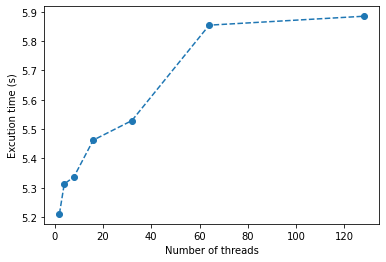

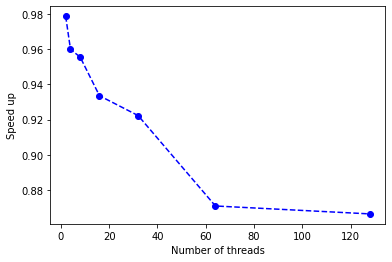

<Figure size 432x288 with 0 Axes>

In [21]:
plot_graphs("parallel_1_loop.csv")

# Parallel second loop schedule FALTA DAR CHECK AOS DADOS

Dropped 49 rows with from the original
Dropped 286 rows after filtering


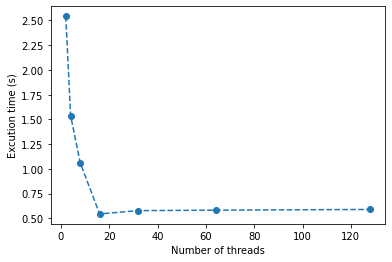

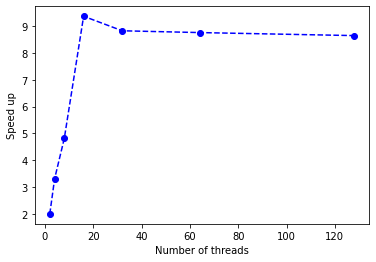

<Figure size 432x288 with 0 Axes>

In [22]:
plot_graphs("parallel_2_loop_schedule.csv")

## 3º Loop

Dropped 0 rows with from the original
Dropped 286 rows after filtering


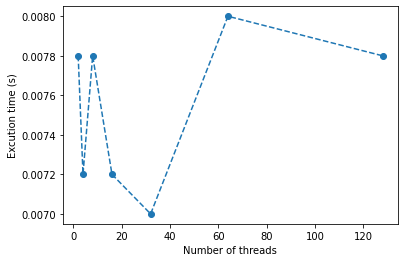

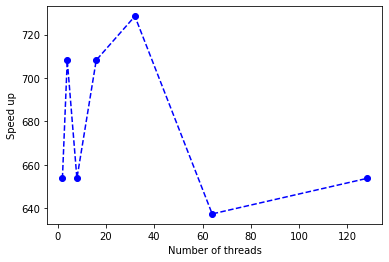

<Figure size 432x288 with 0 Axes>

In [23]:
plot_graphs("parallel_3_loop.csv")

# Parallel quicksort

# Best

Dropped 0 rows with from the original
Dropped 286 rows after filtering


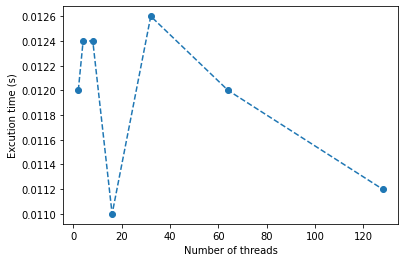

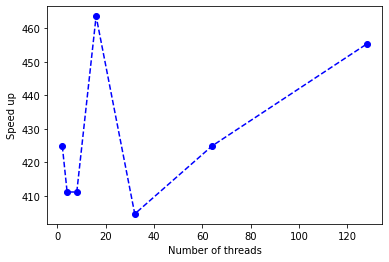

<Figure size 432x288 with 0 Axes>

In [24]:
plot_graphs("best.csv")

# Other stuff

In [11]:
plot_graphs("4_quick_sort_3.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\mgabi\\Documents\\terceiro ano\\paralela\\Trabalho\\PPGraficos\\data\\4_quick_sort_3.csv'